# Final Exam – Part 2 (60 pts)

### Student Name: xxxxxxxx
### Student ID: xxxxxxxx

## General
The instructions for the final exam are included in the cover page shared on OWL. In addion, some basic rules:

This part of the exam is **Open Book** and you will answer to the programming questions below on this Jupyter Notebook. You have **2 hours (3:00 pm - 5:00 pm)** to finish the exam and upload your notebook on OWL. 
* You **are allowed** to use any document and sources on your computer and look up documents on the internet. **You need to cite any code that you use if it is NOT from the course Labs or Tutorial examples**.
* You or **NOT allowed** to share documents, or communicate in any other way with people inside/outside of the exam room during the final. Using AI chatbots is **NOT allowed and will be counted as cheating or plagiarism**.
* All Figures should have a x-axis and y-axis label.
* Add as many cells as you want, whenever you need to. 
* To finish the exam in the alloted time, you will have to work efficiently. You need to submit the exam Jupyter Notebook by the **due date (Dec 12, 2023 at 5:00 pm)** on **OWL in the Assignments / Final Exam - Part 2** where you downloaded the Dataset and Jupyter Notebook. **Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded. 

**Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting.**

### Additional Guidance

If at any point you are not sure about the answer, then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [1]:
## Preliminaries
### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

import time
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# If you prefer to use tensorflow load these libraries:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam


2023-12-12 16:40:46.481011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset
In this exam, we will work on the network anomaly detection dataset "IP_Activity_Dataset_5000.csv". It was generated from web server access logs and collected from a real-world website in Content Delivery Networks (CDNs). Each sample/row in the dataset represents a unique Internet Protocol (IP) address with 9 columns/variables. Each feature/column is a performance indicator that reflect the state or activity of each sample/IP. The IP addresses were masked due to privacy reasons.  

### Variables/Features
Feature description: 
1.	**requests**: the number of requests sent by per IP.
2.	**request-interval**:  the average time interval between consecutive requests sent by per IP. Unit: milliseconds
3.	**request-popularity**: what percentage of the requests sent by per IP are for popular contents.
4.	**bytes**: the average bytes received by per IP after requesting the content.
5.	**delivery-time**: the average request delivery time experienced by per IP. Unit: milliseconds
6.	**hit-rate**: cache hit rate of per IP.
7.	**nodes**: the number of nodes that received requests from per IP.
8.	**contents**: the number of contents/files that per IP requested for.
9.	**label**: 0-normal, 1-abnormal (potential cache pollution attacks). 

---
# Question 1 - Explore dataset ( X / 5 pts )

- Read the dataset "IP_Activity_Dataset_5000.csv" as a pandas dataframe.
- Print the number of observations in the dataset
- Print the number of variables in the dataset (all variables regardless of whether they are a feature or label or neither)
- Print the number of observations for each class in the 'label' variable
- Print the first five rows of the dataset

In [2]:
df = pd.read_csv('IP_Activity_Dataset_5000.csv')
print(df.shape[0])
print(df.columns)
print(df['label'].value_counts())
print(df.head())

5000
Index(['requests', 'request-interval', 'request-popularity', 'bytes',
       'delivery-time', 'hit-rate', 'nodes', 'contents', 'label'],
      dtype='object')
label
0    4500
1     500
Name: count, dtype: int64
   requests  request-interval  request-popularity        bytes  delivery-time  \
0        18        378.605278            1.000000    29.667209      38.833333   
1         5          0.524200            1.000000    19.226953     204.600000   
2      1141         66.912231            0.167647    19.847204     142.072963   
3        80          2.472875            0.418750  1769.312634    1330.787500   
4         1          0.000000            1.000000     0.000000       2.000000   

   hit-rate  nodes  contents  label  
0  0.888889      2         9      0  
1  1.000000      1         5      0  
2  0.021520      5       703      1  
3  1.000000      2        76      0  
4  1.000000      1         1      0  


---
---
# Question 2 - Classification and Evaluation (X / 55 pts)
Your next task is to build classification models that can identify the malicious attacker IPs.

---
## Question 2 Part A - Data Splitting For Classification ( X / 3 pts )
- Use 'label' as the target variable y for your classification models for abnormal IP detection, and other variables as the feature set X.
- Split the data into equals-sized training and test sets, and ensure the balanced distribution of labels when splitting data.

In [3]:
X = df.drop(columns='label')
y = df['label']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

---
## Question 2 Part B - Data Standardization ( X / 3 pts )
- Z-standarize the input features of the training and test sets.
- All the questions below should be based on the standarized dataset.

In [4]:
scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(Xtrain)
XtestScaled = scaler.fit_transform(Xtest)

---
## Question 2 Part C - Random Forest ( X / 6 pts )
- Build a Random Forest model that consists of 5 base decision trees with the maximum depth of 5, and fit the training set. Set random state to 42.
- Print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model when evaluating the testing performance of your model.


In [5]:
t0 = time.time()
random_forest = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
random_forest.fit(XtrainScaled, ytrain)
print(f'Training Time: {time.time() - t0}')
ypred_rf = random_forest.predict(XtestScaled)

t0 = time.time()
print(accuracy_score(ytest, ypred_rf))
print(f1_score(ytest, ypred_rf))
print(confusion_matrix(ytest, ypred_rf))
print(f'Testing Time: {time.time() - t0}')

Training Time: 0.0284268856048584
0.924
0.391025641025641
[[2249    1]
 [ 189   61]]
Testing Time: 0.009256124496459961


---
## Question 3 Part D - Feature Selection by Random Forest ( X / 12 pts )
- Use the Random Forest model you built in Q2-C to generate feature importance scores and select the most important features (rank the importance scores of each feature in descending order, and only select the important features from most to least important until the accumulated relative importance score reaches 90% or 0.9).
- Use a horizontal bar chart to plot the importance scores of all features in descending order. Add appropriate x-axis and y-axis labels.
- Print out the selected features with their importance scores, and generate the new training and test sets with the new feature set. 
- Retrain the same Random Forest model from Q2-C on the new training set, and print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model on the new test set.

nodes                 0.081450
hit-rate              0.095605
requests              0.141777
request-popularity    0.259249
contents              0.356512
dtype: float64
Training Time: 0.011974096298217773
0.9944
0.97165991902834
[[2246    4]
 [  10  240]]
Testing Time: 0.010282039642333984


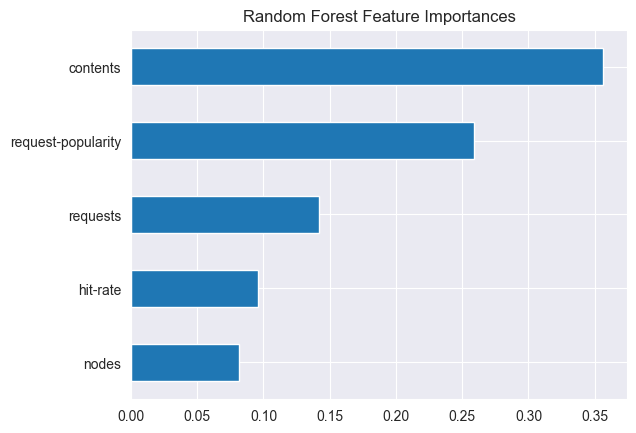

In [6]:
feature_names = Xtrain.columns
f_importances = pd.Series(
random_forest.feature_importances_, index=feature_names).sort_values()
f_importances.drop(['bytes', 'delivery-time', 'request-interval'], inplace=True)
ax = f_importances.plot.barh()
ax.set_title("Random Forest Feature Importances")

print(f_importances)

X = df.drop(columns=['label', 'bytes', 'delivery-time', 'request-interval'])
y = df['label']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
XtrainScaled = scaler.fit_transform(Xtrain)
XtestScaled = scaler.fit_transform(Xtest)

t0 = time.time()
random_forest = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
random_forest.fit(XtrainScaled, ytrain)
print(f'Training Time: {time.time() - t0}')
ypred_rf = random_forest.predict(XtestScaled)

t0 = time.time()
print(accuracy_score(ytest, ypred_rf))
print(f1_score(ytest, ypred_rf))
print(confusion_matrix(ytest, ypred_rf))
print(f'Testing Time: {time.time() - t0}')

---
## Question 2 Part E - Hyperparamete Tuning of Random Forest ( X / 10 pts )
- Use 3-fold grid search to tune two hyperparameters for the Random Forest model you built in Q2-D:
    - The number of base estimators/decision trees (find the better value among the two numbers 10 and 20).
    - The maximum tree depth (find the better value among the two numbers 10 and 20).
- Print out the detected better hyperparameter values and cross-validation score.
- Build the Random Forest model with the better hyperparameter values you found, and fit the new training set from Q2-D.
- Report the accuracy, F1-score. confusion matrix, and execution time (including both training and testing time) of the model when evaluating the testing performance of your model on the new test set from Q2-D.


In [7]:
params = {'n_estimators': (10, 20)}
gs = GridSearchCV(random_forest, param_grid=params, cv=3, scoring='neg_mean_squared_error', refit=True)
gs.fit(XtrainScaled, ytrain)
p1 = gs.best_params_['n_estimators']
params = {'max_depth': (10, 20)}
gs2 = GridSearchCV(random_forest, param_grid=params, cv=3, scoring='neg_mean_squared_error', refit=True)
gs2.fit(XtrainScaled, ytrain)
p2 = gs2.best_params_['max_depth']
print(f'Best # of estimators: {p1}')
print(f'Best # of max depth: {p2}')

t0 = time.time()
random_forest = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
random_forest.fit(XtrainScaled, ytrain)
print(f'Training Time: {time.time() - t0}')
ypred_rf = random_forest.predict(XtestScaled)

t0 = time.time()
print(accuracy_score(ytest, ypred_rf))
print(f1_score(ytest, ypred_rf))
print(confusion_matrix(ytest, ypred_rf))
print(f'Testing Time: {time.time() - t0}')

Best # of estimators: 10
Best # of max depth: 10
Training Time: 0.019876956939697266
0.9944
0.97165991902834
[[2246    4]
 [  10  240]]
Testing Time: 0.003888845443725586


---
## Question 2 Part F - Random Forest Performance Discussion (X/ 4 pts)
- Compare the performance of the three models from Questions 2-C, 2-D, and 2-E, and discuss reasons for performance difference.
- Compare the execution time of the three models from Questions 2-C, 2-D, and 2-E, and discuss reasons for time/efficiency difference.

#### Written answer: Explain here.
The accuracy and f1 scores were both significantly better in the models from 2D and 2E compared to 2C but the 2D and 2E scored the same.

#### Written answer: Explain here.
All the models took roughly the same amount of time to execute.

---
## Question 2 Part G - Neural Network Model (X/ 12 pts)
Build a MLP (multi layer perceptron) model to fit the training set from Question 2-B. The details of the MLP model are as follows:
- The model should have two hidden layers with 32 neurons each, and use ReLU activation function. 
- The output layer should have sigmoid activation function. 
- Compile the model with binary cross-entropy loss function, Adam optimizer with learning rate of 0.001, and accuracy as the metric.
- Train the model for 10 epochs with batch size of 32. 
- Evaluate the trained model on the test data, and print the accuracy, F1-score. confusion matrix, and execution time (including both training and testing time) of the model.
- Record the loss for each iteration of the MLP model you trained in Q2-G, and make a plot of the number of iterations/epochs vs loss(Cross Entropy). Add appropriate x-axis and y-axis labels.

The model training time is 17351.1 ms


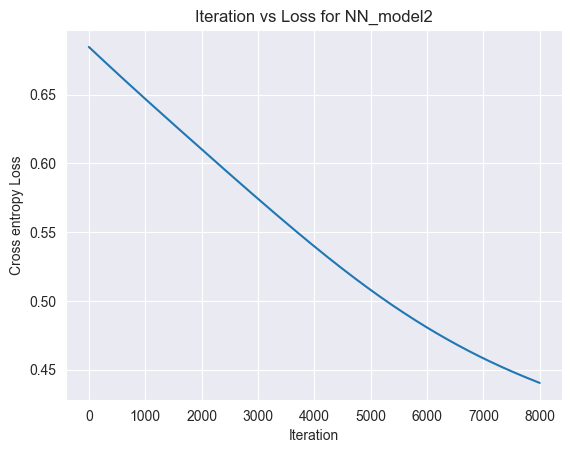

In [8]:
class MLP(torch.nn.Module):
    
    def __init__(self, num_features, num_classes):
        super().__init__()
        # Neural Network Architecture:
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=32)
        self.activation1 = torch.nn.ReLU()
        self.dense2 = torch.nn.Linear(in_features=32, out_features=32)
        self.activation2 = torch.nn.ReLU()
        self.dense3 = torch.nn.Linear(in_features=32, out_features=num_classes)
        self.activation3 = torch.nn.Sigmoid()
        
    def forward(self, X):
        X = self.dense1(X)  
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        X = self.dense3(X)
        X = self.activation3(X)
        return X
   
Xt = torch.FloatTensor(XtrainScaled) 
yt = torch.LongTensor(ytrain)
model = MLP(XtrainScaled.shape[1], 2)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

max_iter = 8000
lossRecord = np.zeros(max_iter)
time1 = time.time()
for i in range(max_iter):
    optimizer.zero_grad() 
    y_pred = model.forward(Xt)
    loss = criterion(input=y_pred, target=yt)
    lossRecord[i]=loss
    loss.backward()
    optimizer.step()
time2 = time.time()
plt.plot(np.arange(max_iter),lossRecord)
plt.xlabel('Iteration')
plt.ylabel('Cross entropy Loss')
plt.title('Iteration vs Loss for NN_model2')

print('The model training time is '+ str(round((time2-time1)*1000,2)) + ' ms')

---
## Question 2 Part H- ROC Curve Plot for MLP (X/ 5 pts )
- Plot the ROC curve for evaluating the MLP model on the test set.
- Report the area under the ROC curve.

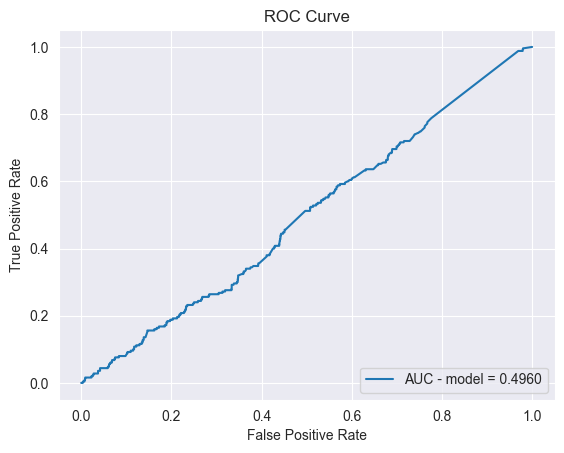

The area under the ROC curve is 0.49604088888888886


In [9]:
yprob = y_pred.detach().numpy()[:, 1]  
fpr, tpr, thresholds = roc_curve(ytest, yprob)
auc_roc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC - model = {auc_roc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print('The area under the ROC curve is', auc_roc)

---
---
---
**You're done! As always, double-check your work by re-running the notebook from scratch.**